#**Introduction**



Congratulations on reaching this point of the course! 

As a capstone project, you will perform a complete differential expression analysis pipeline integrating key concepts from all the modules covered thus far. This will provide an opportunity to combine your fundamental UNIX, Python, R, and computational biology skills to produce interpretable results. 

The transcriptomic data you will use for this project originates from the work of Arunachalam et al. and is described in their journal article: [Systems biological assessment of immunity to mild versus severe COVID-19 infection in humans](https://www.science.org/doi/10.1126/science.abc6261). Their study sought to address the COVID-19 pandemic by investigating connections between the human immune response to SARS-CoV-2 and severity of infection. To achieve this, they conducted RNA-Seq on bulk peripheral blood mononuclear cells (PBMCs) of both healthy and COVID-19 infected individuals. It is these two cohorts that will serve as the subjects of your project.

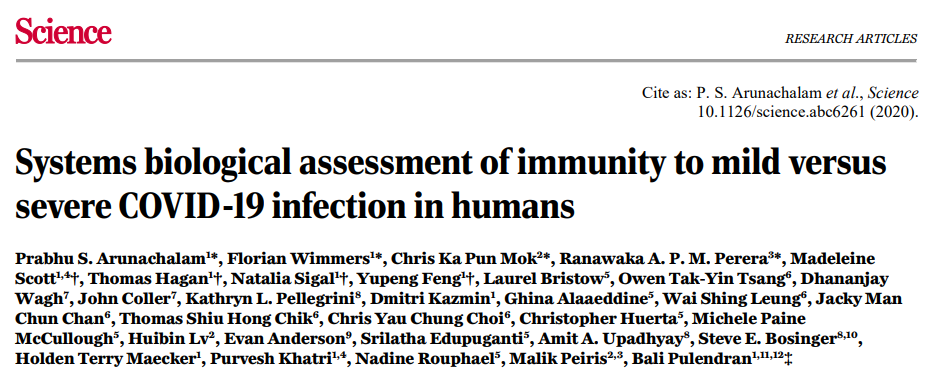

#**Instructions**

In a copy of this Google Colab notebook, follow the steps outlined below to fill in all `code-blocks` and answer the questions denoted by <font color='red'>red text</font>. You may freely reference any of the code provided to you in the previous lab assignments. 

Once complete, submit your copied notebook to your individual Google Drive folder.

You will be graded based on two categories: your responses to the questions, and whether your Colab notebook can produce a GitHub repository similar to the example here: [CynthiaFlaire/Bioinformatics-Course-2022_FinalProjectExample](https://github.com/CynthiaFlaire/Bioinformatics-Course-2022_FinalProjectExample). Specifically, your repo should, for the most part, mirror its file structure and contents using your own data.

And with that, Good Luck! 


#**Part 1: Preparing the data**

Your first task is to download the dataset we have prepared for you. Your data is stored in a directory labeled with your name and can be accessed from the following repository: [CynthiaFlaire/Bioinformatics-Course-2022_Datasets](https://github.com/CynthiaFlaire/Bioinformatics-Course-2022_Datasets). 

Upon opening your designated folder, you will find two subfolders named 'COVID' and 'Healthy', each containing three compressed FASTQ files from the respective cohort.

**Question 1.** To download a specific file from a typical file-hosting website directly into a notebook, which of the following is strictly necessary?

* A) a webpage link
* B) a direct link
* C) either a webpage or direct link
* D) a repository link

<font color='red'>Type your answer here.</font> 

On GitHub, you can obtain this kind of link by navigating to your file of interest and right-clicking on the Download button shown in the screenshot below. Then, by clicking `Copy link address`, the link will be copied to your clipboard and can be pasted as text.

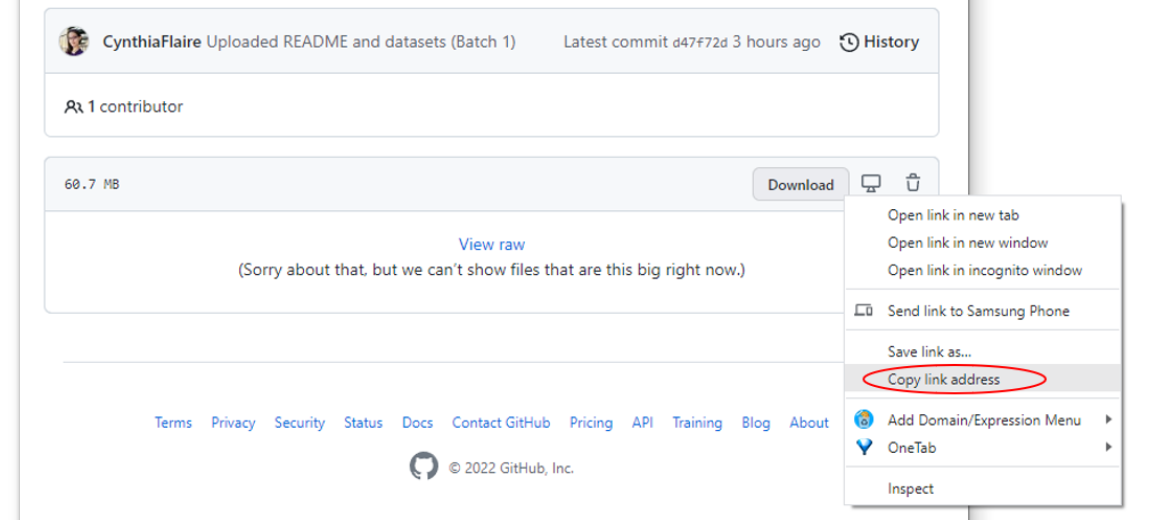

Peform this six times to get the links for all six of your samples. You may store them in the text box below for your convenience:

_COVID_


----

_Healthy_

Next, create a directory to store your data called `data` in the code-block below:

Next, download your files into the `data` directory using one or more code-blocks below:

Notice that these files have a secondary extension, `.fastq.zst`, similar to the `.fastq.gz`/`.fq.gz` extension you have seen before. Similar to `gz`, the `.zst` extension signifies that the file was compressed with a command-line program, in this case, `zstd`. The key difference between them is that `zstd` peforms better by several metrics (ex. compression speed & compression ratio). 

To decompress your `.fastq.zst` samples for further use, you need to install `zstd`

**Question 2.** `zstd` is a command-line program. As such, which of the following methods should you use to download it?

* A) Python's `import` keyword
* B) Bioconductor's `install()` function
* C) CRAN's `install.packages()` function
* D) `conda` or `mamba`

<font color='red'>Type your answer here.</font> 

**Question 3.** Does the method you chose support custom environments? Additionally, what are environments used for?

<font color='red'>Type your answer here.</font> 

**Question 4.** After setting up two environments: one named `envOne` with `bwa` installed, and another named `envTwo` with `bowtie2` installed, what type of message will the code below output? Explain why this occurs.

```
%%bash
source activate envOne
bowtie2 --help
```

<font color='red'>Type your answer here.</font> 

Now, use your chosen method to download `zstd`. Do so using one or more code-blocks below:

Now that `zstd` is installed, call it below to decompress each of your `.fastq.gz` files. This will take the `-d`/`--decompress` flag, and the file to decompress as an argument.

The next step is to perform quality control on your FASTQ files. This will remove bad reads that could potentially skew the results you produce. A handy all-in-one program to perform quality control is `fastp`, another command-line program. Install `fastp` in one or more code-blocks below. 

( _Hint:_ If you experience trouble installing `fastp`, try using a new environment. )

Now you are ready to pre-process your FASTQ files for quality control. Start by creating a directory for the filtered files called `filtered` in the code-block below:

Then, call `fastp` with the `-i` (input) and `-o` (output) parameters for each of your FASTQ files.

The argument to `-i` should be an input file. The argument to `-o` should be a chosen name and/or path for an output file. For your project, store the output files in the `filtered` directory.

Additionally, add the code `--json /dev/null --html /dev/null` to the end of the `fastp` command to suppress quality report output. We will not need them for this project.

You may notice from the output messages that no reads were filtered out. This is due to the nature of the data we have prepared for you. In most cases, however, bad reads will be found and filtered out during this step. 

Finally, to conclude this section, remove the intermediate unfiltered, decompressed `.fastq` files that remain in the `data` directory:

#**Part 2: Transcript Quantification**

Your RNA-Seq data is now fully prepared. However, an additional file will be  needed to process it into transcript counts.

**Question 5.** What type of additional file do you need? Why do you need it?

<font color='red'>Type your answer here.</font> 

With your answer in mind, locate the additional file on the Ensembl website for the latest Human genome assembly (GRCh38.p13) via this link:
https://ensembl.org/Homo_sapiens/Info/Index

The exact file you need is called `Homo_sapiens.GRCh38.cdna.all.fa.gz` as shown below.

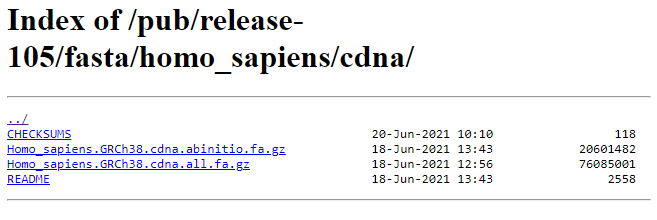

Once found, use your UNIX knowledge to download the file to this notebook via the code-block below.

( _Hint._  If you are unsure how to proceed, your approach to Question 1 and identify the equivalent to the Download button on the  webpage screenshotted above. )

You now have all the files you need to quantify transcript expression.

**Question 6.** What method will you use to quantify RNA transcripts? What advantages does your choice present?

* A) Splice-aware alignment to a genome
* B) Alignment to a transcriptome
* C) Quasi-mapping

<font color='red'>Type your answer here.</font> 

With your choice made, start by installing the necessary program/s to perform the above method in the code-block below:

Next, consider the procedure and input necessary to produce transcript counts with the program/s you just downloaded. 

**Question 7.** True or False: It is best to align or quasi-map RNA reads directly to a transcriptome, without any additional steps.

* A) True
* B) False

<font color='red'>Type your answer here.</font> 

Based on your answer, write the code to quantify RNA transcripts in one or more code-blocks below:

With the transcript abundance files now produced, clean up your workspace by removing the intermediary `filtered` directory in the code-block below:

#**Part 3: Differential Expression Analysis (DEA)**

Now that you have obtained counts of every transcript, you will want to make comparisons between sample groups to identify occurances of differential expression.

To accomplish this, we will use the R packages introduced previously. In one or more code-blocks below, install the necessary R packages for DEA.

Once installation is complete, use one or more code-blocks below to store your sample metadata in an R-accessible `data.frame`. With this, the R packages you installed will be able to access your transcript count data and distinguish whether each sample came from a COVID-infected or healthy individual. 

Then, run the code-blocks below to create a directory for storing the R objects produced during DEA. 

In [ ]:
%%R
biocFileCacheDir <- file.path('R','BiocFileCache')
dir.create(biocFileCacheDir, recursive = TRUE, showWarnings = FALSE)
setTximetaBFC(biocFileCacheDir)

In [ ]:
%%bash
chmod g+w  ./R/BiocFileCache/
ls -lh ./R

Next, the following steps will facilitate the conversion of transcript-level counts to gene-level counts and later, the annotation of gene accession IDs with their gene nomenclature. 

**Question 8.** What is the difference between a transcript and a gene? Why is it often preferable to convert from transcript-level counts to gene-level counts for DEA?

( _Hint._  Consider alternative splicing and the macromolecules involved. )

<font color='red'>Type your answer here.</font> 

To perform this conversion, information mapping transcripts to their known gene annotations is necessary. Such information is often stored within GFF/GTF format files. The details of this format can be found here: 
[GFF/GTF File Format - Definition and supported options](http://ensembl.org/info/website/upload/gff.html)


Like the FASTA transcriptome you used in the previous section, gene annotation files (GTF/GFF) may also be located on the Ensembl website. In the code-block below, locate and download the gene annotation file for the latest Ensembl release of the GRCh38.p13 human assembly. 


The file you need to locate is called `Homo_sapiens.GRCh38.105.gtf.gz` as shown below. 






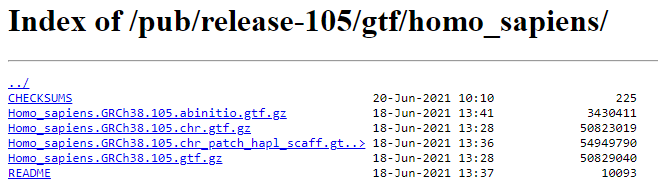

Now that the annotation file has been added to the notebook environment, you will need to link it to the FASTA transcriptome and its Salmon index to create a "linked transcriptome" as defined within the Tximeta vignette. 

To do so, fill in the ◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼ within the code-blocks below then run them to obtain genes-level count data using the "linked transcriptome" and sample metadata contained within `coldata`. 

In [ ]:
%%R
fastaFile <- '◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼' 
gtfFile <- '◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼'
makeLinkedTxome(indexDir='◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼',
                source='Ensembl',
                organism='Homo sapiens',
                release='105',
                genome='GRCh38.p13',
                fasta=fastaFile,
                gtf=gtfFile)

transcriptSummarizedExp <- tximeta(coldata, type='salmon', txOut=TRUE, useHub=FALSE)

In [ ]:
%%R
geneSummarizedExp <- summarizeToGene(transcriptSummarizedExp)

The output of these two code-blocks is an R SummarizedExperiment object storing gene-level abundances. With this, you can now run count normalization and statistical tests to discover differentally expressed genes. 

**Question 9.** Before comparing RNA-Seq gene count data, it is necessary to normalize those counts. In your own words, describe what the purpose of this is.




( _Hint._  Refer to the Module 5 "Basics of RNA-Seq technology and bioinformatics tools" slides if you are unsure. )

<font color='red'>Type your answer here.</font> 

For the reason you just described, run the normalization and statisical test steps of DEA using one or more code-blocks below. 

The output of these steps is another special R object. This object contains the normalized abundance of all genes contained within the FASTA transcriptome that were successfully annotated. As one might expect, it typical for only a portion of these genes to show any expression. To assess this difference in your own data, run the two code-blocks below.

In [ ]:
%%R
nrow(dds)

In [ ]:
%%R
nrow(dds[ rowSums(counts(dds)) > 1, ])

**Question 10.** In the above code, what does the `nrow()` function do? What does the first output number represent? What does the second output number represent?

<font color='red'>Type your answer here.</font> 

Knowing this, use the above two code-blocks to write R code that will filter out the unexpressed genes. This should produce a reduced version of the R object called `ddsTwo`.

Next, fill in each ◼◼◼◼◼ below with the correct `sample_type` label (ex. "Healthy" or "COVID") to extract a results table from the reduced object. The first ◼◼◼◼◼ and second ◼◼◼◼◼ will serve as the numerator and divisor of fold change respectively. 

In [ ]:
%%R
resultsTable <- results(ddsTwo, contrast=c("condition","◼◼◼◼◼","◼◼◼◼◼"), tidy=TRUE)
head(resultsTable)

Finally, run the code below to add a new column to the results table containg the official human gene nomenclature for each Ensembl gene accession. 

In [ ]:
%%R
resultsTable <- cbind(resultsTable, gene_name = gsub('-','_',rowData(ddsTwo)$gene_name))
head(resultsTable)

#**Part 4: Data Visualization**

After completing the previous section, you now have an R `data.frame` containing your samples' gene-level expession data combined with gene-name annotations. With this and your `DESeqDataSet` object, you will be able to use what you learned about Data Visualization to organize your processed data and highlight the parts of it relevant to your hypotheses of interest. 

To start, consider the plots you have been introduced to so far in previous Differential Expression Anlysis assignments. These plots include Volcano Plots, Principal Component Analysis (PCA) plots, and Hierarchically Clustered Heatmaps. 

For the first plot, produce a Volcano plot in the one or more code-blocks below. Take note to use the correct p-value column from your results `data.frame`. 

**Question 11.** What aspects of Differential Expression Analysis datasets are often highlighted using Volcano Plots.

<font color='red'>Type your answer here.</font> 

**Question 12.** In your own words, describe what the multiple comparisons problem is and how it relates to Differential Expression Analysis.

<font color='red'>Type your answer here.</font> 

**Question 13.** Below, list the names of two genes that exhibited much higher expression within the COVID cohort. Likewise, do the same for two genes that exhibited much lower expression within the COVID cohort.

<font color='red'>Type your answer here.</font> 

Next, create a PCA plot below using one or more code-blocks. Be sure to apply a variance-stabilizing transformation to the input data prior to plotting. This will reduce the bias towards the most highly expressed genes.

**Question 14.** With your own words, define what dimensionality reduction is and state what the dimensions summarized in your PCA plot are. 

<font color='red'>Type your answer here.</font> 

**Question 15.** Using your own words, what is homoscedasticty and heteroscedasticity? When you apply a varriance-stablizing transcformation, are you correcting your data to be more homoscedastic or heteroscedastic? 

<font color='red'>Type your answer here.</font> 

Both the Volcano Plot and PCA plots are best made within R because of the simplicity of the EnhancedVolcano package, and the PCA plot's reliance on the un-transformed differential expression values stored within the DESeqDataSet object. 

However, sometimes you will want to export data outside of R for processing or visualization with other, non-R software. You can perform this export process on your variance-stabilized data using the code displayed here. This code assumes the name of your transformed data (a DESeqTransform object) is `dst`. 



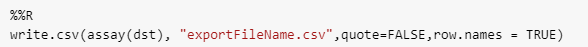

In a code-block below, run this function to produce a `.csv` format file. 

In past lessons, we introduced the power of the Python library Seaborn for easily producing publication-worthy graphs.  So while we have previously used the R function `heatmap.2()` to create a heiarchially-clustered heatmap, we can now use Seaborn as well.  

With one or more the code-blocks below, plot a Seaborn clustermap from a **subset** of your transformed differential expression data. 

Note that like Seaborn's `heatmap()` function, `clustermap()` also requires maxtrix data (instead of categorical data) as input. 

For more information about Seaborn's `clustermap()` function, you may refer to the documentation here:
https://seaborn.pydata.org/generated/seaborn.clustermap.html



**Question 16.** True or False? When using the Pandas library to subset a DataFrame, any changes stored under the same DataFrame name will overwrite the previous DataFrame.

<font color='red'>Type your answer here.</font> 

Congratulations! You now have three different graphical representations of your data that you can use to present your data in posters, papers, and more.

#**Part 5: Sharing your data and results**

Now that you have obtained your input data, processed it into tabular form, and produced visualizations from it, you are now ready to share your results with others. So, using what you previously learned about Git and GitHub, create a **private** repo with a structure similar to what was introduced at the beginning of the course.

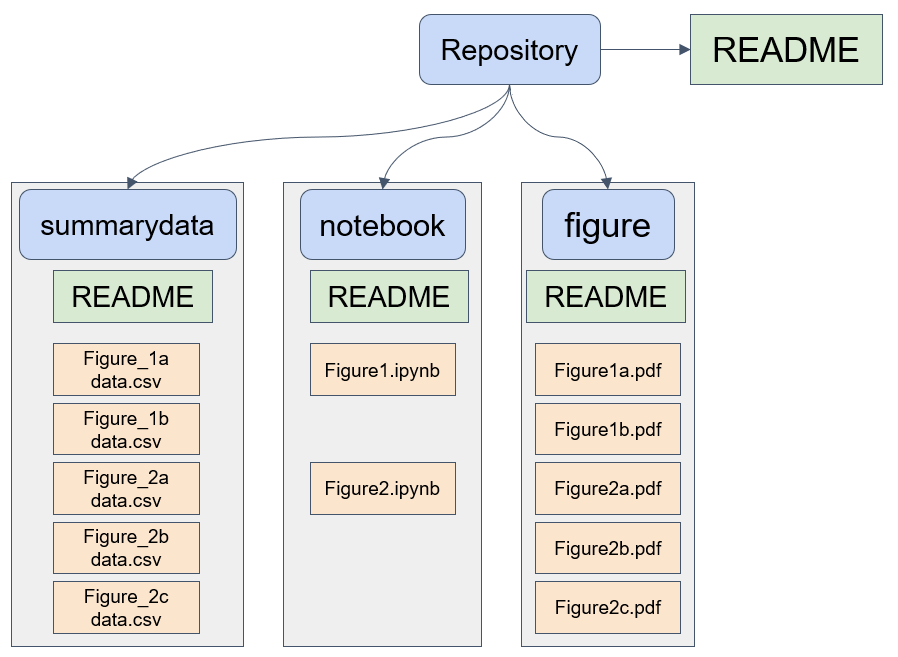

**Question 17.** Describe how sharing your data, code, and figures in this manner increases the transparency and reproducibility of your research.

<font color='red'>Type your answer here.</font> 

To start, reorganize your project directory to be similar to the structure above prior to converting your working directory into a repo. To peform this, you will need to download your copy of the notebook as a `.ipynb` file via File -> Download -> Download .ipynb at the top of this webpage.

Additionally, if you previously deleted your input `.zst` files, remember to re-download them for inclusion in your repository's data directory.

Once you have created the above file structure, delete all other files and folders in `/content` and create the README files as shown in the figure above. 

**Question 18.** What is the purpose of a README file in the parent Repository directory?

<font color='red'>Type your answer here.</font> 

**Question 19.** What is the purpose of the README files in the subdirectories?

<font color='red'>Type your answer here.</font> 

Then, convert your project directory into a Git respoistory and upload it as a **private** GitHub repo using one or more code-blocks below.

Once completed, follow the instructions outlined here to share your repository with one of our TA's accounts, `CynthiaFlaire`:

https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository

Note we may ask you to share your private repo with additional TAs at a later date.

With that completed, Congratulations! You have finished the entirety of your capstone project!